<a href="https://colab.research.google.com/github/AhmedEloumi/Analyse-des-ventes-SMART-POHNE-/blob/main/Analyse_des_ventes_d'une_entreprise(SMART_PHONE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


In [23]:
files=[file for file in os.listdir(r'/content/phone data')]

In [24]:
#le nom des datasets
for file in files :
  print( file)


Sales_March_2019.csv
Sales_November_2019.csv
Sales_July_2019.csv
Sales_April_2019.csv
Sales_January_2019.csv
Sales_September_2019.csv
Sales_February_2019.csv
Sales_December_2019.csv
Sales_June_2019.csv
Sales_May_2019.csv
Sales_August_2019.csv
Sales_October_2019.csv


#**regrouper les fichier**

###**creer une base de données vide**

In [57]:

all_data=pd.DataFrame()


In [58]:
for file in files :
  current_data=pd.read_csv('/content/phone data'+'/'+file)
  all_data=pd.concat([all_data,current_data])
print(all_data)


      Order ID                     Product Quantity Ordered Price Each  \
0       162009                      iPhone                1        700   
1       162009    Lightning Charging Cable                1      14.95   
2       162009            Wired Headphones                2      11.99   
3       162010  Bose SoundSport Headphones                1      99.99   
4       162011      34in Ultrawide Monitor                1     379.99   
...        ...                         ...              ...        ...   
20374   278792       AA Batteries (4-pack)                1       3.84   
20375   278793            Wired Headphones                1      11.99   
20376   278794       AA Batteries (4-pack)                1       3.84   
20377   278795                      iPhone                1        700   
20378   278796            Wired Headphones                1      11.99   

           Order Date                         Purchase Address  
0      03/28/19 20:59          942 Church St, 

In [59]:
print(all_data.shape)

(186850, 6)


In [60]:
all_data.to_csv('/content/phone data'+'/all_data.csv',index=False)

In [61]:
all_data.dtypes
print( all_data.dtypes.value_counts())

object    6
dtype: int64


#**vsiualiserles valeurs manquantes**
###**aanalyse des valeurs manquantes:**

Order ID            0.002917
Product             0.002917
Quantity Ordered    0.002917
Price Each          0.002917
Order Date          0.002917
Purchase Address    0.002917
dtype: float64


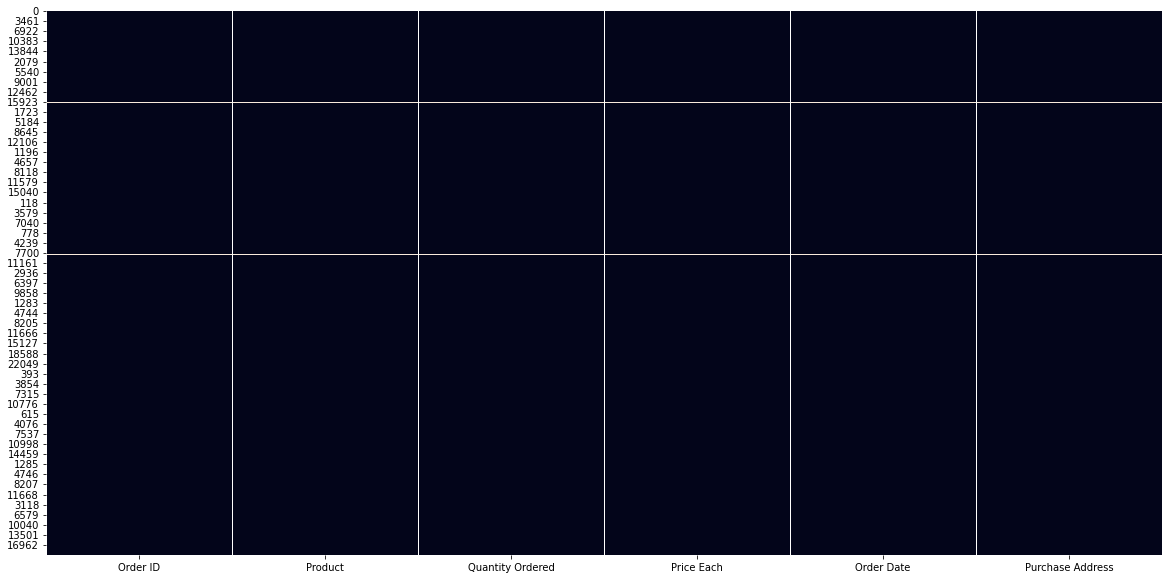

In [32]:
plt.figure(figsize=(20,10))
sns.heatmap(all_data.isna(),cbar=False)
s=(all_data.isna().sum()/all_data.shape[0]).sort_values(ascending=True)
print(s)

In [33]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

###**supprimer les valeurs manquantes**

In [66]:
all_data=all_data.dropna(how='all')
all_data.shape

(186305, 6)

In [67]:
def month(x):
  return x.split('/')[0]
month('12/04/19 10:15')

'12'

In [68]:
all_data['Order Date']=all_data['Order Date'].astype(str)
all_data['Month']= all_data['Order Date'].apply(month)
all_data['Month'].unique()

array(['03', '04', 'Order Date', '11', '12', '07', '08', '05', '01', '02',
       '09', '10', '06'], dtype=object)

In [69]:
all_data=all_data[all_data['Month']!='Order Date']
all_data['Month'].unique()

array(['03', '04', '11', '12', '07', '08', '05', '01', '02', '09', '10',
       '06'], dtype=object)

In [70]:
all_data['Month']=all_data['Month'].astype(int)
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int64
dtype: object

In [71]:
all_data['Price Each']=all_data['Price Each'].astype(float)
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

##**chiffre d'affaire**

In [72]:

all_data['CA']=all_data['Price Each']*all_data['Quantity Ordered']
ca=all_data.groupby('Month')['CA'].sum()
print(ca)

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: CA, dtype: float64


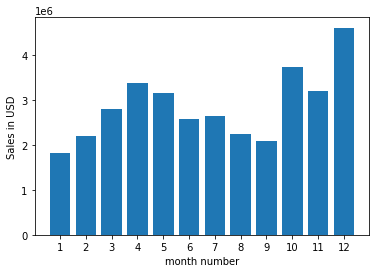

In [73]:
months=range(1,13)
plt.bar(months,ca)
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('month number')
plt.show()


***donc le mois décembre est le mois qui posséde le plus grand chiffre d'affaire***

**Dans quelle ville on a enregistré un maximum de commandes ??**

In [78]:
def ville(x):
  return x.split(',')[1]
all_data['ville']= all_data['Purchase Address'].apply(ville)
all_data['ville'].unique()

array([' Austin', ' San Francisco', ' Boston', ' Atlanta', ' Portland',
       ' Dallas', ' Los Angeles', ' New York City', ' Seattle'],
      dtype=object)

In [79]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,CA,ville
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00,Austin
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95,Austin
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98,Austin
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco
...,...,...,...,...,...,...,...,...,...
20374,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",10,3.84,San Francisco
20375,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",10,11.99,Los Angeles
20376,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",10,3.84,San Francisco
20377,278795,iPhone,1,700.00,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",10,700.00,Seattle


In [80]:
all_data.groupby('ville')['ville'].count()

ville
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: ville, dtype: int64

Text(0, 0.5, 'commande number')

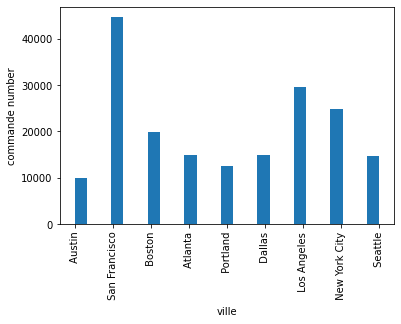

In [86]:
plt.hist(all_data['ville'],bins=25)
plt.xticks(rotation='vertical')
plt.xlabel("ville")
plt.ylabel('commande number')

**En quelle moment doit on faire une compagne publicitaire pour avoir plus de ventes ?**

In [87]:
all_data['hour']=pd.to_datetime(all_data['Order Date']).dt.hour  
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,CA,ville,hour
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00,Austin,20
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95,Austin,20
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98,Austin,20
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco,5
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco,0
...,...,...,...,...,...,...,...,...,...,...
20374,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",10,3.84,San Francisco,4
20375,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",10,11.99,Los Angeles,22
20376,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",10,3.84,San Francisco,20
20377,278795,iPhone,1,700.00,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",10,700.00,Seattle,17


In [99]:
Hours=[]
Keys=[]
for key,hour in all_data.groupby('hour'):
  
  Hours.append(len(hour))
  Keys.append(key)
Hours


[3910,
 2350,
 1243,
 831,
 854,
 1321,
 2482,
 4011,
 6256,
 8748,
 10944,
 12411,
 12587,
 12129,
 10984,
 10175,
 10384,
 10899,
 12280,
 12905,
 12228,
 10921,
 8822,
 6275]

Hours est la liste de nombre de commande par heure
-
Keys est la liste des heures

Text(0, 0.5, 'commande number')

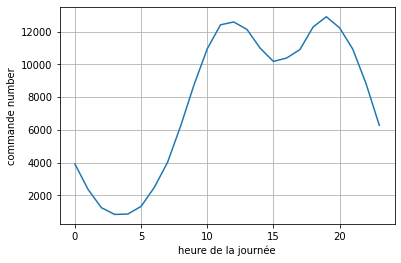

In [103]:
plt.grid()
plt.plot(Keys,Hours)
plt.xlabel("heure de la journée")
plt.ylabel('commande number')

##**Quel produit se vend le plus?**


In [122]:
all_data.groupby('Product')['Quantity Ordered'].sum()
  


Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

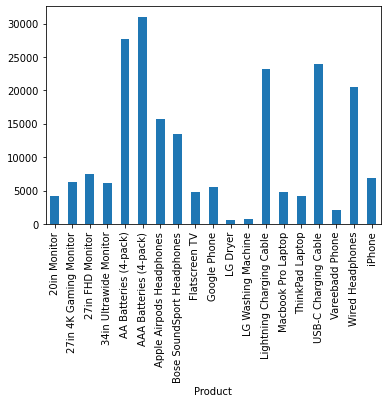

In [123]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [124]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [126]:
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
prices=all_data.groupby('Product')['Price Each'].mean()

[Text(0, 0, '20in Monitor'),
 Text(0, 0, '27in 4K Gaming Monitor'),
 Text(0, 0, '27in FHD Monitor'),
 Text(0, 0, '34in Ultrawide Monitor'),
 Text(0, 0, 'AA Batteries (4-pack)'),
 Text(0, 0, 'AAA Batteries (4-pack)'),
 Text(0, 0, 'Apple Airpods Headphones'),
 Text(0, 0, 'Bose SoundSport Headphones'),
 Text(0, 0, 'Flatscreen TV'),
 Text(0, 0, 'Google Phone'),
 Text(0, 0, 'LG Dryer'),
 Text(0, 0, 'LG Washing Machine'),
 Text(0, 0, 'Lightning Charging Cable'),
 Text(0, 0, 'Macbook Pro Laptop'),
 Text(0, 0, 'ThinkPad Laptop'),
 Text(0, 0, 'USB-C Charging Cable'),
 Text(0, 0, 'Vareebadd Phone'),
 Text(0, 0, 'Wired Headphones'),
 Text(0, 0, 'iPhone')]

<Figure size 2880x1728 with 0 Axes>

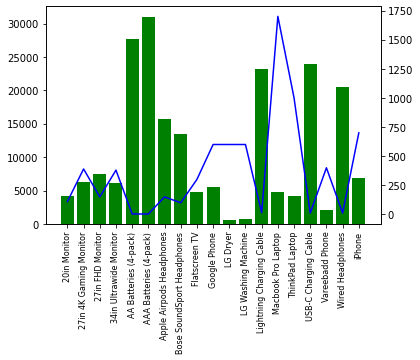

In [132]:
plt.figure(figsize=(40,24))
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity,color='g')
ax2.plot(products,prices,'b-')
ax1.set_xticklabels(products,rotation='vertical',size=8)

**Quelles sont les combinaisons de produits qui se vendent le plus ??**

In [134]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]

In [139]:
df["grouped"]=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,CA,ville,hour,grouped
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00,Austin,20,"iPhone,Lightning Charging Cable,Wired Headphones"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95,Austin,20,"iPhone,Lightning Charging Cable,Wired Headphones"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98,Austin,20,"iPhone,Lightning Charging Cable,Wired Headphones"
30,162037,iPhone,1,700.00,03/23/19 02:11,"277 Elm St, Los Angeles, CA 90001",3,700.00,Los Angeles,2,"iPhone,Lightning Charging Cable"
31,162037,Lightning Charging Cable,1,14.95,03/23/19 02:11,"277 Elm St, Los Angeles, CA 90001",3,14.95,Los Angeles,2,"iPhone,Lightning Charging Cable"
...,...,...,...,...,...,...,...,...,...,...,...
20285,278706,USB-C Charging Cable,1,11.95,10/07/19 18:18,"942 11th St, San Francisco, CA 94016",10,11.95,San Francisco,18,"Google Phone,USB-C Charging Cable"
20289,278710,USB-C Charging Cable,1,11.95,10/13/19 19:05,"183 5th St, San Francisco, CA 94016",10,11.95,San Francisco,19,"USB-C Charging Cable,27in FHD Monitor"
20290,278710,27in FHD Monitor,1,149.99,10/13/19 19:05,"183 5th St, San Francisco, CA 94016",10,149.99,San Francisco,19,"USB-C Charging Cable,27in FHD Monitor"
20298,278718,USB-C Charging Cable,1,11.95,10/13/19 12:45,"479 Lincoln St, Atlanta, GA 30301",10,11.95,Atlanta,12,"USB-C Charging Cable,Bose SoundSport Headphones"


supprimer les elements dumpiquées

In [140]:
df2=df.drop_duplicates(subset=['Order ID'])
df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,CA,ville,hour,grouped
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00,Austin,20,"iPhone,Lightning Charging Cable,Wired Headphones"
30,162037,iPhone,1,700.00,03/23/19 02:11,"277 Elm St, Los Angeles, CA 90001",3,700.00,Los Angeles,2,"iPhone,Lightning Charging Cable"
60,162066,AA Batteries (4-pack),1,3.84,03/13/19 13:57,"602 Pine St, New York City, NY 10001",3,3.84,New York City,13,"AA Batteries (4-pack),USB-C Charging Cable"
66,162071,Vareebadd Phone,1,400.00,03/30/19 20:23,"334 Jackson St, Atlanta, GA 30301",3,400.00,Atlanta,20,"Vareebadd Phone,USB-C Charging Cable"
78,162082,Vareebadd Phone,1,400.00,03/09/19 14:15,"401 Wilson St, New York City, NY 10001",3,400.00,New York City,14,"Vareebadd Phone,Wired Headphones"
...,...,...,...,...,...,...,...,...,...,...,...
20229,278653,iPhone,1,700.00,10/31/19 19:46,"949 Chestnut St, Atlanta, GA 30301",10,700.00,Atlanta,19,"iPhone,Lightning Charging Cable"
20274,278697,Wired Headphones,1,11.99,10/21/19 13:58,"621 North St, Los Angeles, CA 90001",10,11.99,Los Angeles,13,"Wired Headphones,27in 4K Gaming Monitor"
20284,278706,Google Phone,1,600.00,10/07/19 18:18,"942 11th St, San Francisco, CA 94016",10,600.00,San Francisco,18,"Google Phone,USB-C Charging Cable"
20289,278710,USB-C Charging Cable,1,11.95,10/13/19 19:05,"183 5th St, San Francisco, CA 94016",10,11.95,San Francisco,19,"USB-C Charging Cable,27in FHD Monitor"


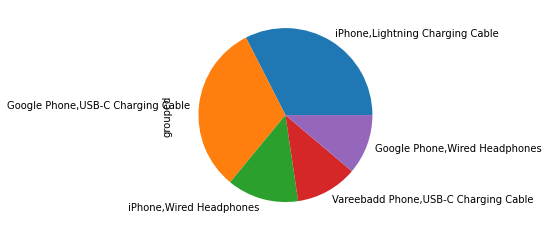

In [142]:
df2['grouped'].value_counts()[0:5].plot.pie() #les 5 premiéres